In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, ResNet101V2, ResNet152V2
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15289888604641486854
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6940786688
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2973108476450089341
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
print(tf.__version__)

2.8.0


In [6]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
train_path="fer_ckplus_kdef_split/train"
test_path="fer_ckplus_kdef_split/test"
val_path="fer_ckplus_kdef_split/val"


In [8]:
(height, width, channels) = (80, 48, 3)

x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(height, width))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(height, width))

        x_test.append(img_arr)
        
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(height, width))

        x_val.append(img_arr)



In [9]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0





In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (height, width),
                                                 batch_size = 32,
                                                 class_mode = 'sparse',
                                                 color_mode="grayscale"
                                                )
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (height, width),
                                            batch_size = 32,
                                            class_mode = 'sparse',
                                            color_mode="grayscale")
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (height, width),
                                            batch_size = 32,
                                            class_mode = 'sparse',
                                            color_mode="grayscale")

Found 26177 images belonging to 7 classes.
Found 3278 images belonging to 7 classes.
Found 3269 images belonging to 7 classes.


In [12]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [13]:
#training_set.class_indices
train_y.shape,test_y.shape,val_y.shape


((26177,), (3278,), (3269,))

In [14]:
IMAGE_SIZE = [48,80]

In [15]:
ResNet152V2 = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


234561536/234545216 [==============================] - 251s 1us/step


In [17]:
for layer in ResNet152V2.layers:
    layer.trainable = False

In [18]:
x = Flatten()(ResNet152V2.output)


In [19]:
prediction = Dense(7, activation='softmax')(x)

model = Model(inputs=ResNet152V2.input, outputs= prediction)

In [20]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 80, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 86, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 40, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 26, 42, 64)   0           ['conv1_conv[0][0]']             
                                                                                              

                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 12, 20, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 12, 20, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 12, 20, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 6, 10, 128)  0           ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 6, 10, 512)   66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_out (Add)         (None, 6, 10, 512)   0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_conv[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block5_1_relu (Activatio  (None, 6, 10, 128)  0           ['conv3_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_2_pad (ZeroPaddin  (None, 8, 12, 128)  0           ['conv3_block5_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv3_block5_2_conv (Conv2D)   (None, 6, 10, 128)   147456      ['conv3_block5_2_pad[0][0]']     
                                                                                                  
 conv3_block5_2_bn (BatchNormal  (None, 6, 10, 128)  512         ['conv3_block5_2_conv[0][0]']    
 ization) 

 ormalization)                                                                                    
                                                                                                  
 conv3_block8_preact_relu (Acti  (None, 6, 10, 512)  0           ['conv3_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv3_block8_1_conv (Conv2D)   (None, 6, 10, 128)   65536       ['conv3_block8_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv3_block8_1_bn (BatchNormal  (None, 6, 10, 128)  512         ['conv3_block8_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 3, 5, 256)    589824      ['conv4_block2_2_pad[0][0]']     
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 3, 5, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 3, 5, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 3, 5, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
          

                                                                 ]                                
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 3, 5, 256)   1024        ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 3, 5, 256)   0           ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_pad (ZeroPaddin  (None, 5, 7, 256)   0           ['conv4_block5_1_relu[0][0]']    
 g2D)                                                                                             
          

 conv4_block7_out (Add)         (None, 3, 5, 1024)   0           ['conv4_block6_out[0][0]',       
                                                                  'conv4_block7_3_conv[0][0]']    
                                                                                                  
 conv4_block8_preact_bn (BatchN  (None, 3, 5, 1024)  4096        ['conv4_block7_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv4_block8_preact_relu (Acti  (None, 3, 5, 1024)  0           ['conv4_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, 3, 5, 256)    262144      ['conv4_block8_preact_relu[0][0]'
          

 conv4_block10_2_conv (Conv2D)  (None, 3, 5, 256)    589824      ['conv4_block10_2_pad[0][0]']    
                                                                                                  
 conv4_block10_2_bn (BatchNorma  (None, 3, 5, 256)   1024        ['conv4_block10_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_2_relu (Activati  (None, 3, 5, 256)   0           ['conv4_block10_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_3_conv (Conv2D)  (None, 3, 5, 1024)   263168      ['conv4_block10_2_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block13_1_bn (BatchNorma  (None, 3, 5, 256)   1024        ['conv4_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block13_1_relu (Activati  (None, 3, 5, 256)   0           ['conv4_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block13_2_pad (ZeroPaddi  (None, 5, 7, 256)   0           ['conv4_block13_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_blo

                                                                  'conv4_block15_3_conv[0][0]']   
                                                                                                  
 conv4_block16_preact_bn (Batch  (None, 3, 5, 1024)  4096        ['conv4_block15_out[0][0]']      
 Normalization)                                                                                   
                                                                                                  
 conv4_block16_preact_relu (Act  (None, 3, 5, 1024)  0           ['conv4_block16_preact_bn[0][0]']
 ivation)                                                                                         
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 3, 5, 256)    262144      ['conv4_block16_preact_relu[0][0]
                                                                 ']                               
          

                                                                                                  
 conv4_block18_2_bn (BatchNorma  (None, 3, 5, 256)   1024        ['conv4_block18_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block18_2_relu (Activati  (None, 3, 5, 256)   0           ['conv4_block18_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block18_3_conv (Conv2D)  (None, 3, 5, 1024)   263168      ['conv4_block18_2_relu[0][0]']   
                                                                                                  
 conv4_block18_out (Add)        (None, 3, 5, 1024)   0           ['conv4_block17_out[0][0]',      
          

 conv4_block21_1_bn (BatchNorma  (None, 3, 5, 256)   1024        ['conv4_block21_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block21_1_relu (Activati  (None, 3, 5, 256)   0           ['conv4_block21_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block21_2_pad (ZeroPaddi  (None, 5, 7, 256)   0           ['conv4_block21_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block21_2_conv (Conv2D)  (None, 3, 5, 256)    589824      ['conv4_block21_2_pad[0][0]']    
          

                                                                                                  
 conv4_block24_preact_bn (Batch  (None, 3, 5, 1024)  4096        ['conv4_block23_out[0][0]']      
 Normalization)                                                                                   
                                                                                                  
 conv4_block24_preact_relu (Act  (None, 3, 5, 1024)  0           ['conv4_block24_preact_bn[0][0]']
 ivation)                                                                                         
                                                                                                  
 conv4_block24_1_conv (Conv2D)  (None, 3, 5, 256)    262144      ['conv4_block24_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_blo

 conv4_block26_2_bn (BatchNorma  (None, 3, 5, 256)   1024        ['conv4_block26_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block26_2_relu (Activati  (None, 3, 5, 256)   0           ['conv4_block26_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block26_3_conv (Conv2D)  (None, 3, 5, 1024)   263168      ['conv4_block26_2_relu[0][0]']   
                                                                                                  
 conv4_block26_out (Add)        (None, 3, 5, 1024)   0           ['conv4_block25_out[0][0]',      
                                                                  'conv4_block26_3_conv[0][0]']   
          

 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 3, 5, 256)   0           ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block29_2_pad (ZeroPaddi  (None, 5, 7, 256)   0           ['conv4_block29_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block29_2_conv (Conv2D)  (None, 3, 5, 256)    589824      ['conv4_block29_2_pad[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block32_preact_bn (Batch  (None, 3, 5, 1024)  4096        ['conv4_block31_out[0][0]']      
 Normalization)                                                                                   
                                                                                                  
 conv4_block32_preact_relu (Act  (None, 3, 5, 1024)  0           ['conv4_block32_preact_bn[0][0]']
 ivation)                                                                                         
                                                                                                  
 conv4_block32_1_conv (Conv2D)  (None, 3, 5, 256)    262144      ['conv4_block32_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block32_1_bn (BatchNorma  (None, 3, 5, 256)   1024        ['conv4_block32_1_conv[0][0]']   
 lization)

 lization)                                                                                        
                                                                                                  
 conv4_block34_2_relu (Activati  (None, 3, 5, 256)   0           ['conv4_block34_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block34_3_conv (Conv2D)  (None, 3, 5, 1024)   263168      ['conv4_block34_2_relu[0][0]']   
                                                                                                  
 conv4_block34_out (Add)        (None, 3, 5, 1024)   0           ['conv4_block33_out[0][0]',      
                                                                  'conv4_block34_3_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv5_block1_1_bn (BatchNormal  (None, 2, 3, 512)   2048        ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 2, 3, 512)   0           ['conv5_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_2_pad (ZeroPaddin  (None, 4, 5, 512)   0           ['conv5_block1_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv5_block1_2_conv (Conv2D)   (None, 2, 3, 512)    2359296     ['conv5_block1_2_pad[0][0]']     
          

                                                                                                  
 conv5_block3_out (Add)         (None, 2, 3, 2048)   0           ['conv5_block2_out[0][0]',       
                                                                  'conv5_block3_3_conv[0][0]']    
                                                                                                  
 post_bn (BatchNormalization)   (None, 2, 3, 2048)   8192        ['conv5_block3_out[0][0]']       
                                                                                                  
 post_relu (Activation)         (None, 2, 3, 2048)   0           ['post_bn[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 12288)        0           ['post_relu[0][0]']              
                                                                                                  
 dense (De

In [21]:
model.compile(
  tf.keras.optimizers.Adam(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)

In [23]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=50,
  callbacks=[early_stop],
  batch_size=64,shuffle=True)

Epoch 1/50
410/410 [==============================] - 42s 83ms/step - loss: 2.5416 - accuracy: 0.3811 - val_loss: 2.9934 - val_accuracy: 0.3588
Epoch 2/50
410/410 [==============================] - 31s 76ms/step - loss: 1.7920 - accuracy: 0.5042 - val_loss: 3.6171 - val_accuracy: 0.3224
Epoch 3/50
410/410 [==============================] - 31s 75ms/step - loss: 1.5913 - accuracy: 0.5540 - val_loss: 2.5597 - val_accuracy: 0.4176
Epoch 4/50
410/410 [==============================] - 30s 74ms/step - loss: 1.3962 - accuracy: 0.5932 - val_loss: 2.6016 - val_accuracy: 0.4292
Epoch 5/50
410/410 [==============================] - 30s 74ms/step - loss: 1.2143 - accuracy: 0.6352 - val_loss: 2.7698 - val_accuracy: 0.4390
Epoch 6/50
410/410 [==============================] - 30s 74ms/step - loss: 1.1541 - accuracy: 0.6499 - val_loss: 6.2292 - val_accuracy: 0.2830
Epoch 7/50
410/410 [==============================] - 30s 74ms/step - loss: 1.5766 - accuracy: 0.6358 - val_loss: 2.7536 - val_accuracy:

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [25]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [26]:
print(classification_report(y_pred,test_y,zero_division=0))


              precision    recall  f1-score   support

           0       0.35      0.34      0.34       488
           1       0.23      0.78      0.35        23
           2       0.23      0.35      0.28       227
           3       0.68      0.61      0.64      1014
           4       0.42      0.37      0.39       566
           5       0.38      0.37      0.37       553
           6       0.59      0.61      0.60       407

    accuracy                           0.47      3278
   macro avg       0.41      0.49      0.42      3278
weighted avg       0.49      0.47      0.48      3278



In [27]:
confusion_matrix_=confusion_matrix(y_pred,test_y)


In [28]:
confusion_matrix_

array([[165,  26,  43,  63,  67,  93,  31],
       [  1,  18,   0,   2,   1,   1,   0],
       [ 28,   3,  79,  35,  23,  29,  30],
       [101,   9,  56, 615,  92,  95,  46],
       [ 73,   8,  52,  71, 212, 104,  46],
       [ 82,  16,  56,  93,  81, 203,  22],
       [ 23,   0,  60,  27,  32,  16, 249]], dtype=int64)

In [29]:
import seaborn as sb
from matplotlib.colors import LogNorm, PowerNorm


Confusion Matrix


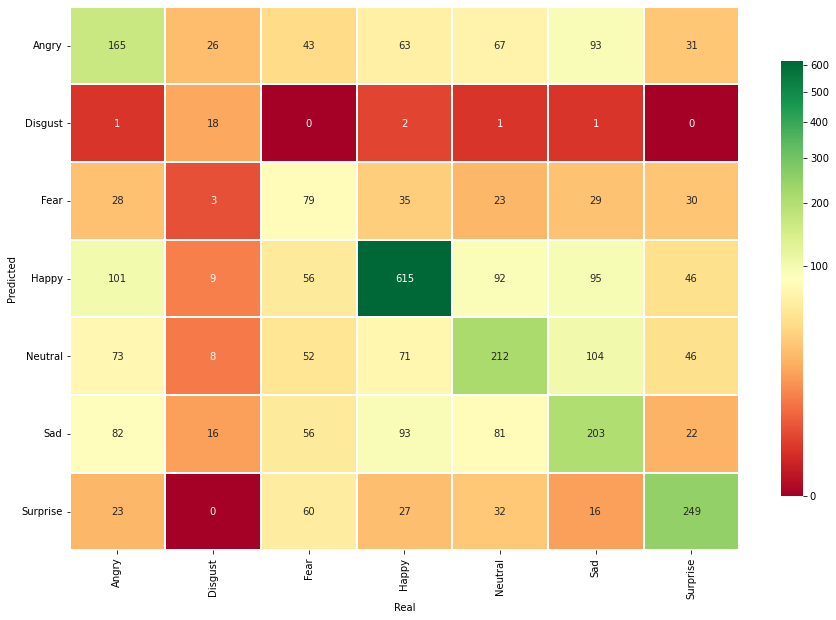

In [30]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad','Surprise']
positions = list(range(len(labels)))
positions = [x+0.5 for x in positions]

print(f'Confusion Matrix')
fig, ax = plt.subplots(figsize=(15, 10))
# plot heatmap
sb.heatmap(confusion_matrix_,
           cmap='RdYlGn',
           annot=True,
           fmt="1d",
           linewidth=0.3,
           cbar_kws={"shrink": .8},
           norm=PowerNorm(vmin=confusion_matrix_.min().min(),
                          vmax=confusion_matrix_.max().max(),
                          gamma=0.35)
          )

plt.xlabel('Real')
ax.set_xticks(positions, labels, rotation = 90)
plt.ylabel('Predicted')
ax.set_yticks(positions, labels, rotation = 0)
plt.show()